In [1]:
# Подключаем библиотеки
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Model, model_from_json
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
%matplotlib inline

Using TensorFlow backend.


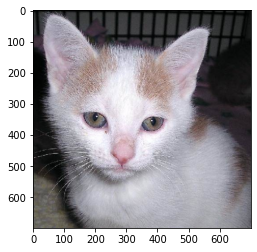

In [2]:
# image_file_name = 'test\dogs\dog.10632.jpg'
image_file_name = 'test\cats\cat.10724.jpg'
img = image.load_img(image_file_name, target_size=(700, 700))
plt.imshow(img)

In [3]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

In [4]:
def GetSavedModelsDict():
    SavedModelsDict = {}
    SavedModelsNames = [
        'VGG16',
        'Xception',
        'VGG19',
        'ResNet50' ,
        'InceptionV3',
        'InceptionResNetV2',
        'MobileNet',
        'MobileNetV2',
        'DenseNet169',
        'ResNet152V2',
        'EfficientNetB6'
    ]
    for NetName in SavedModelsNames:
        json_file = open("dogs-vs-cats-model" + NetName + ".json", "r")
        loaded_model = json_file.read()
        json_file.close()
        loaded_model = model_from_json(loaded_model)
        loaded_model.load_weights("dogs-vs-cats-model" + NetName + "gpu.h5")
        
        SavedModelsDict.update({NetName : loaded_model})
        
    return SavedModelsDict

In [5]:
SavedModelsDict = GetSavedModelsDict()

In [6]:
SavedModelsNetsDict = {}
for net in SavedModelsDict.items():
    SavedModelsNetsDict.update({net[0] : net[1].layers[0]})
    
for net in SavedModelsNetsDict.items():
    net[1].summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

batch_normalization_116 (BatchN (None, 16, 16, 64)   192         conv2d_116[0][0]                 
__________________________________________________________________________________________________
activation_156 (Activation)     (None, 16, 16, 32)   0           batch_normalization_111[0][0]    
__________________________________________________________________________________________________
activation_158 (Activation)     (None, 16, 16, 32)   0           batch_normalization_113[0][0]    
__________________________________________________________________________________________________
activation_161 (Activation)     (None, 16, 16, 64)   0           batch_normalization_116[0][0]    
__________________________________________________________________________________________________
block35_1_mixed (Concatenate)   (None, 16, 16, 128)  0           activation_156[0][0]             
                                                                 activation_158[0][0]             
          

Total params: 54,336,736
Trainable params: 54,276,192
Non-trainable params: 60,544
__________________________________________________________________________________________________
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 151, 151, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
________________________________________________________________

conv5_block12_1_bn (BatchNormal (None, 4, 4, 128)    512         conv5_block12_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block12_1_relu (Activatio (None, 4, 4, 128)    0           conv5_block12_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_block12_2_conv (Conv2D)   (None, 4, 4, 32)     36864       conv5_block12_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block12_concat (Concatena (None, 4, 4, 1024)   0           conv5_block11_concat[0][0]       
                                                                 conv5_block12_2_conv[0][0]       
__________________________________________________________________________________________________
conv5_block13_0_bn (BatchNormal (None, 4, 4, 1024)   4096        conv5_block12_concat[0][0]       
__________

Total params: 58,331,648
Trainable params: 0
Non-trainable params: 58,331,648
__________________________________________________________________________________________________
Model: "efficientnetb6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 150, 150, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 150, 150, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_co

# Обрезка

In [10]:
Layers = []

Xception_Layers = (
    Model(inputs=SavedModelsNetsDict.get('Xception').input, outputs=SavedModelsNetsDict.get('Xception').layers[1].output),
    Model(inputs=SavedModelsNetsDict.get('Xception').input, outputs=SavedModelsNetsDict.get('Xception').layers[4].output),
    Model(inputs=SavedModelsNetsDict.get('Xception').input, outputs=SavedModelsNetsDict.get('Xception').get_layer('conv2d_4').output)
)
Layers.append(Xception_Layers)


VGG19_Layers = (
    Model(inputs=SavedModelsNetsDict.get('VGG19').input, outputs=SavedModelsNetsDict.get('VGG19').get_layer('block1_conv1').output),
    Model(inputs=SavedModelsNetsDict.get('VGG19').input, outputs=SavedModelsNetsDict.get('VGG19').get_layer('block3_conv1').output),
    Model(inputs=SavedModelsNetsDict.get('VGG19').input, outputs=SavedModelsNetsDict.get('VGG19').get_layer('block5_conv4').output)
)
Layers.append(VGG19_Layers)


ResNet50_Layers = (
    Model(inputs=SavedModelsNetsDict.get('ResNet50').input, outputs=SavedModelsNetsDict.get('ResNet50').get_layer('conv1').output),
    Model(inputs=SavedModelsNetsDict.get('ResNet50').input, outputs=SavedModelsNetsDict.get('ResNet50').get_layer('res2a_branch2a').output),
    Model(inputs=SavedModelsNetsDict.get('ResNet50').input, outputs=SavedModelsNetsDict.get('ResNet50').get_layer('res5c_branch2c').output)
)
Layers.append(ResNet50_Layers)


InceptionV3_Layers = (
    Model(inputs=SavedModelsNetsDict.get('InceptionV3').input, outputs=SavedModelsNetsDict.get('InceptionV3').get_layer('conv2d_5').output),
    Model(inputs=SavedModelsNetsDict.get('InceptionV3').input, outputs=SavedModelsNetsDict.get('InceptionV3').get_layer('conv2d_6').output),
    Model(inputs=SavedModelsNetsDict.get('InceptionV3').input, outputs=SavedModelsNetsDict.get('InceptionV3').get_layer('conv2d_98').output)
)
Layers.append(InceptionV3_Layers)


InceptionResNetV2_Layers = (
    Model(inputs=SavedModelsNetsDict.get('InceptionResNetV2').input, outputs=SavedModelsNetsDict.get('InceptionResNetV2').get_layer('conv2d_99').output),
    Model(inputs=SavedModelsNetsDict.get('InceptionResNetV2').input, outputs=SavedModelsNetsDict.get('InceptionResNetV2').get_layer('conv2d_101').output),
    Model(inputs=SavedModelsNetsDict.get('InceptionResNetV2').input, outputs=SavedModelsNetsDict.get('InceptionResNetV2').get_layer('block8_10_conv').output)
)
Layers.append(InceptionResNetV2_Layers)


MobileNet_Layers = (
    Model(inputs=SavedModelsNetsDict.get('MobileNet').input, outputs=SavedModelsNetsDict.get('MobileNet').get_layer('conv1').output),
    Model(inputs=SavedModelsNetsDict.get('MobileNet').input, outputs=SavedModelsNetsDict.get('MobileNet').get_layer('conv_pw_2').output),
    Model(inputs=SavedModelsNetsDict.get('MobileNet').input, outputs=SavedModelsNetsDict.get('MobileNet').get_layer('conv_pw_13').output)
)
Layers.append(MobileNet_Layers)


ResNet50_Layers = (
    Model(inputs=SavedModelsNetsDict.get('ResNet50').input, outputs=SavedModelsNetsDict.get('ResNet50').get_layer('conv1').output),
    Model(inputs=SavedModelsNetsDict.get('ResNet50').input, outputs=SavedModelsNetsDict.get('ResNet50').get_layer('res2a_branch2b').output),
    Model(inputs=SavedModelsNetsDict.get('ResNet50').input, outputs=SavedModelsNetsDict.get('ResNet50').get_layer('res5c_branch2c').output)
)
Layers.append(ResNet50_Layers)

MobileNetV2_Layers = (
    Model(inputs=SavedModelsNetsDict.get('MobileNetV2').input, outputs=SavedModelsNetsDict.get('MobileNetV2').get_layer('Conv1').output),
    Model(inputs=SavedModelsNetsDict.get('MobileNetV2').input, outputs=SavedModelsNetsDict.get('MobileNetV2').get_layer('block_1_expand').output),
    Model(inputs=SavedModelsNetsDict.get('MobileNetV2').input, outputs=SavedModelsNetsDict.get('MobileNetV2').get_layer('Conv_1').output)
)
Layers.append(MobileNetV2_Layers)

DenseNet169_Layers = (
    Model(inputs=SavedModelsNetsDict.get('DenseNet169').input, outputs=SavedModelsNetsDict.get('DenseNet169').get_layer('conv1/conv').output),
    Model(inputs=SavedModelsNetsDict.get('DenseNet169').input, outputs=SavedModelsNetsDict.get('DenseNet169').get_layer('conv2_block2_1_conv').output),
    Model(inputs=SavedModelsNetsDict.get('DenseNet169').input, outputs=SavedModelsNetsDict.get('DenseNet169').get_layer('conv5_block32_2_conv').output)
)
Layers.append(DenseNet169_Layers)

ResNet152V2_Layers = (
    Model(inputs=SavedModelsNetsDict.get('ResNet152V2').input, outputs=SavedModelsNetsDict.get('ResNet152V2').get_layer('conv1_conv').output),
    Model(inputs=SavedModelsNetsDict.get('ResNet152V2').input, outputs=SavedModelsNetsDict.get('ResNet152V2').get_layer('conv2_block1_2_conv').output),
    Model(inputs=SavedModelsNetsDict.get('ResNet152V2').input, outputs=SavedModelsNetsDict.get('ResNet152V2').get_layer('conv5_block3_3_conv').output)
)
Layers.append(ResNet152V2_Layers)

EfficientNetB6_Layers = (
    Model(inputs=SavedModelsNetsDict.get('EfficientNetB6').input, outputs=SavedModelsNetsDict.get('EfficientNetB6').get_layer('stem_conv').output),
    Model(inputs=SavedModelsNetsDict.get('EfficientNetB6').input, outputs=SavedModelsNetsDict.get('EfficientNetB6').get_layer('block1a_se_reduce').output),
    Model(inputs=SavedModelsNetsDict.get('EfficientNetB6').input, outputs=SavedModelsNetsDict.get('EfficientNetB6').get_layer('top_conv').output)
)
Layers.append(EfficientNetB6_Layers)

In [11]:
for layer_tuple in Layers:
    for layer in layer_tuple:
        layer.summary()

Model: "functional_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 74, 74, 32)        864       
Total params: 864
Trainable params: 864
Non-trainable params: 0
_________________________________________________________________
Model: "functional_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 74, 74, 32)        864       
_________________________________________________________________
block1_conv1_bn (BatchNormal (None, 74, 74, 32)        128       
________________________________

block35_6_mixed (Concatenate)   (None, 16, 16, 128)  0           activation_186[0][0]             
                                                                 activation_188[0][0]             
                                                                 activation_191[0][0]             
__________________________________________________________________________________________________
block35_6_conv (Conv2D)         (None, 16, 16, 320)  41280       block35_6_mixed[0][0]            
__________________________________________________________________________________________________
block35_6 (Lambda)              (None, 16, 16, 320)  0           block35_5_ac[0][0]               
                                                                 block35_6_conv[0][0]             
__________________________________________________________________________________________________
block35_6_ac (Activation)       (None, 16, 16, 320)  0           block35_6[0][0]                  
__________

_________________________________________________________________
conv_dw_9_relu (ReLU)        (None, 9, 9, 512)         0         
_________________________________________________________________
conv_pw_9 (Conv2D)           (None, 9, 9, 512)         262144    
_________________________________________________________________
conv_pw_9_bn (BatchNormaliza (None, 9, 9, 512)         2048      
_________________________________________________________________
conv_pw_9_relu (ReLU)        (None, 9, 9, 512)         0         
_________________________________________________________________
conv_dw_10 (DepthwiseConv2D) (None, 9, 9, 512)         4608      
_________________________________________________________________
conv_dw_10_bn (BatchNormaliz (None, 9, 9, 512)         2048      
_________________________________________________________________
conv_dw_10_relu (ReLU)       (None, 9, 9, 512)         0         
_________________________________________________________________
conv_pw_10

conv4_block31_concat (Concatena (None, 9, 9, 1248)   0           conv4_block30_concat[0][0]       
                                                                 conv4_block31_2_conv[0][0]       
__________________________________________________________________________________________________
conv4_block32_0_bn (BatchNormal (None, 9, 9, 1248)   4992        conv4_block31_concat[0][0]       
__________________________________________________________________________________________________
conv4_block32_0_relu (Activatio (None, 9, 9, 1248)   0           conv4_block32_0_bn[0][0]         
__________________________________________________________________________________________________
conv4_block32_1_conv (Conv2D)   (None, 9, 9, 128)    159744      conv4_block32_0_relu[0][0]       
__________________________________________________________________________________________________
conv4_block32_1_bn (BatchNormal (None, 9, 9, 128)    512         conv4_block32_1_conv[0][0]       
__________

conv4_block30_preact_relu (Acti (None, 10, 10, 1024) 0           conv4_block30_preact_bn[0][0]    
__________________________________________________________________________________________________
conv4_block30_1_conv (Conv2D)   (None, 10, 10, 256)  262144      conv4_block30_preact_relu[0][0]  
__________________________________________________________________________________________________
conv4_block30_1_bn (BatchNormal (None, 10, 10, 256)  1024        conv4_block30_1_conv[0][0]       
__________________________________________________________________________________________________
conv4_block30_1_relu (Activatio (None, 10, 10, 256)  0           conv4_block30_1_bn[0][0]         
__________________________________________________________________________________________________
conv4_block30_2_pad (ZeroPaddin (None, 12, 12, 256)  0           conv4_block30_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_bloc

Total params: 40,950,927
Trainable params: 0
Non-trainable params: 40,950,927
__________________________________________________________________________________________________


In [37]:
Predictions = []
for layer_tuple in Layers:
    for layer in layer_tuple:
        Predictions.append(layer.predict(img_array))
        
Predictions

[array([[[[ 0.04098635,  0.03319728, -0.0497067 , ...,  0.07203764,
            0.05006642,  0.02620024],
          [ 0.03690033,  0.0260293 , -0.04058412, ...,  0.07091837,
           -0.01050847,  0.02801648],
          [ 0.0346051 ,  0.01767323, -0.02995141, ...,  0.04991433,
            0.02034687,  0.02618241],
          ...,
          [ 0.04256313,  0.04585613, -0.0492548 , ...,  0.03929773,
            0.1632295 ,  0.02234378],
          [ 0.04851909,  0.06387287, -0.07012397, ...,  0.05881632,
            0.22504602,  0.02121245],
          [ 0.05542946,  0.07277447, -0.10043099, ...,  0.13675785,
            0.17321837,  0.02440777]],
 
         [[ 0.06159737,  0.05128546, -0.07879549, ...,  0.04182474,
            0.10375187,  0.02977467],
          [ 0.05753168,  0.0420677 , -0.07099355, ...,  0.050745  ,
            0.02954852,  0.03062128],
          [ 0.05224591,  0.03445622, -0.06007688, ...,  0.03968276,
            0.03090974,  0.02907729],
          ...,
          [ 0

In [38]:
# функция для заполнения выходной решетки признаков
def GetFeatureGrid(images_per_row, size, n_cols, prediction):
    display_grid = np.zeros((n_cols* size, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = prediction[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
    return display_grid

In [61]:
OutGridParams = []

for prediction_tuple in Predictions:
    for prediction in prediction_tuple:
        images_per_row = 5
        n_filters = prediction.shape[-1]
        size = prediction.shape[1]
        n_cols = n_filters // images_per_row
        
        OutGridParams.append({
            'images_per_row' : images_per_row, 
            'n_filters' : n_filters, 
            'size' : size, 
            'n_cols' : n_cols
        })   
    
OutGridParams

[{'images_per_row': 5, 'n_filters': 32, 'size': 349, 'n_cols': 6},
 {'images_per_row': 5, 'n_filters': 64, 'size': 347, 'n_cols': 12},
 {'images_per_row': 5, 'n_filters': 1024, 'size': 22, 'n_cols': 204},
 {'images_per_row': 5, 'n_filters': 64, 'size': 700, 'n_cols': 12},
 {'images_per_row': 5, 'n_filters': 256, 'size': 175, 'n_cols': 51},
 {'images_per_row': 5, 'n_filters': 512, 'size': 43, 'n_cols': 102},
 {'images_per_row': 5, 'n_filters': 64, 'size': 350, 'n_cols': 12},
 {'images_per_row': 5, 'n_filters': 64, 'size': 175, 'n_cols': 12},
 {'images_per_row': 5, 'n_filters': 2048, 'size': 22, 'n_cols': 409},
 {'images_per_row': 5, 'n_filters': 32, 'size': 349, 'n_cols': 6},
 {'images_per_row': 5, 'n_filters': 32, 'size': 347, 'n_cols': 6},
 {'images_per_row': 5, 'n_filters': 192, 'size': 20, 'n_cols': 38},
 {'images_per_row': 5, 'n_filters': 32, 'size': 349, 'n_cols': 6},
 {'images_per_row': 5, 'n_filters': 64, 'size': 347, 'n_cols': 12},
 {'images_per_row': 5, 'n_filters': 2080, 'siz

In [62]:
FeatureGrids = []

#for prediction_tuple in Predictions:
#    for prediction in prediction_tuple:
#        FeatureGrids.append(GetFeatureGrid())
        
for i in range(len(Predictions)):
    Params = OutGridParams[i]
    print(
        Params.get('images_per_row'),
        Params.get('size'),
        Params.get('n_cols'))
        
    Grid = GetFeatureGrid(
        Params.get('images_per_row'),
        Params.get('size'),
        Params.get('n_cols'),
        Predictions[i])
    
    FeatureGrids.append(Grid)        

5 349 6
5 347 12
5 22 204
5 700 12
5 175 51
5 43 102
5 350 12
5 175 12
5 22 409
5 349 6
5 347 6
5 20 38
5 349 6
5 347 12
5 20 416
5 350 6
5 175 25
5 21 204
5 350 12
5 175 12
5 22 409
5 350 6
5 350 19
5 22 256
5 350 12
5 175 25
5 21 6
5 350 12
5 175 12
5 22 409
5 350 11
5 1 2
5 22 460


<ipython-input-38-baa52c8a824a>:8: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


In [63]:
# функция для отображения решетки признаков
def ShowFeatureGrid(size, grid, scale_param):
    # Размер изображения
    scale = scale_param / size

    # Построение фигуры
    plt.figure(figsize=(scale * grid.shape[1], scale * grid.shape[0]))

    # Не отображать решетку
    plt.grid(False)

    # Показ фигуры
    plt.imshow(grid, aspect='auto', cmap='viridis')

KeyboardInterrupt: 

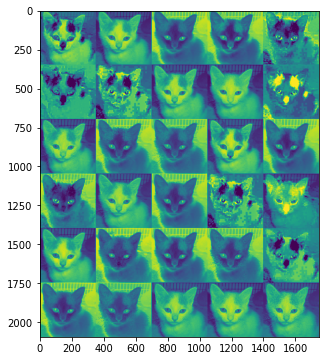

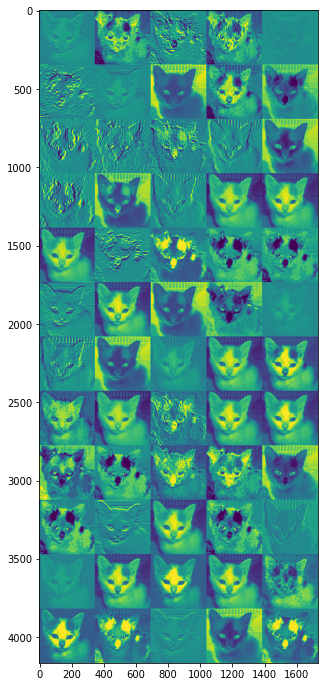

In [ ]:
for i in range(len(FeatureGrids)):
    Params = OutGridParams[i]
    ShowFeatureGrid(Params.get('size'), FeatureGrids[i], 1.)